In [ ]:
# import numpy as np
# import pandas as pd
# cern_df = pd.read_csv("/content/dielectron.csv")
# print(cern_df.head(3))
# # cern_df.isna().sum() ## number of NA
# cern_df.drop_duplicates(inplace=True)
# cern_df.drop(columns=["Event","Run"],inplace=True)

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# nan_index = cern_df[cern_df['M'].isnull()].index
# all_columns = cern_df.columns
# imp_mean = IterativeImputer(random_state=0)
# cern_df = pd.DataFrame(imp_mean.fit_transform(cern_df), columns=all_columns)
# cern_df.loc[nan_index, 'M']

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Read the data from CSV file
cern_df = pd.read_csv("/content/dielectron.csv")
print(cern_df.head(3))

# Drop duplicates and unnecessary columns
cern_df.drop_duplicates(inplace=True)
cern_df.drop(columns=["Event", "Run"], inplace=True)

# Handle missing values
nan_index = cern_df[cern_df['M'].isnull()].index
all_columns = cern_df.columns
imp_mean = IterativeImputer(random_state=0)
cern_df = pd.DataFrame(imp_mean.fit_transform(cern_df), columns=all_columns)
cern_df.loc[nan_index, 'M']

# Apply Isolation Forest
X = cern_df.values

# Specify the contamination level (proportion of outliers)
contamination = 0.1

# Create and fit the Isolation Forest model
clf = IsolationForest(contamination=contamination, random_state=0)
clf.fit(X)

# Predict the anomaly scores for each sample
anomaly_scores = clf.decision_function(X)

# Add the anomaly scores to the dataframe
cern_df['Anomaly Score'] = anomaly_scores

# Display the updated dataframe
print(cern_df.head())

      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   

      eta1     phi1  Q1       E2       px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.03234 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.71350  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.47280  2.25895 -15.5888   2.69667   

       eta2     phi2  Q2         M  
0 -2.344030 -2.07281  -1   8.94841  
1  0.808077  2.73492   1  15.89300  
2 -2.455080  2.14857   1  38.38770  
         E1      px1         py1       pz1       pt1     eta1     phi1   Q1  \
0  58.71410  -7.31132  10.531000 -57.29740  12.82020 -2.20267  2.17766  1.0   
1   6.61188  -4.15213  -0.579855  -5.11278   4.19242 -1.02842 -3.00284 -1.0   
2  25.54190 -11.4

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# Load the CERN di-electron collision data
cern_df = pd.read_csv("/content/dielectron.csv")

# Remove duplicates and unnecessary columns
cern_df.drop_duplicates(inplace=True)
cern_df.drop(columns=["Event","Run"], inplace=True)

# Impute missing values using IterativeImputer
imp_mean = IterativeImputer(random_state=0)
cern_df = pd.DataFrame(imp_mean.fit_transform(cern_df), columns=cern_df.columns)

# Standardize the data
scaler = StandardScaler()
cern_df = pd.DataFrame(scaler.fit_transform(cern_df), columns=cern_df.columns)

# Convert the DataFrame to a NumPy array
data = cern_df.values


In [ ]:
from sklearn.ensemble import IsolationForest

# Create an instance of Isolation Forest
isolation_forest = IsolationForest(random_state=42)

# Fit the model to the data
isolation_forest.fit(data)


IsolationForest(random_state=42)

In [ ]:
# Predict anomalies (outliers) using Isolation Forest
predictions = isolation_forest.predict(data)


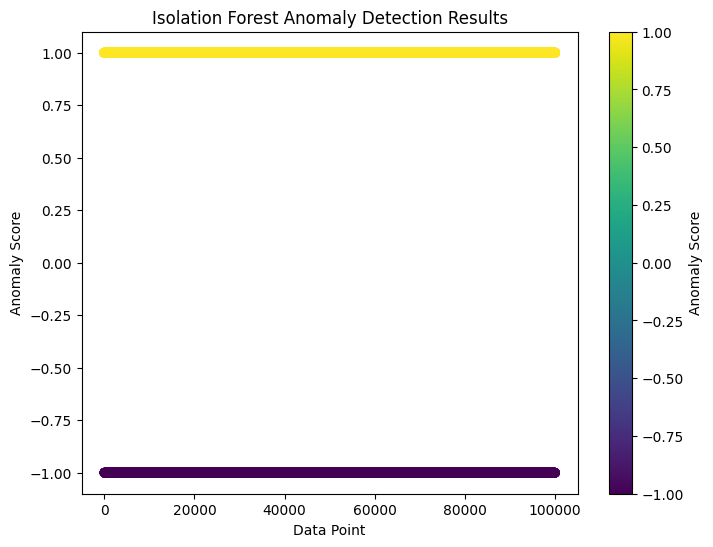

In [ ]:
import matplotlib.pyplot as plt

# Plot the anomaly predictions
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predictions)), predictions, c=predictions, cmap='viridis')
plt.title("Isolation Forest Anomaly Detection Results")
plt.xlabel("Data Point")
plt.ylabel("Anomaly Score")
plt.colorbar(label="Anomaly Score")
plt.show()


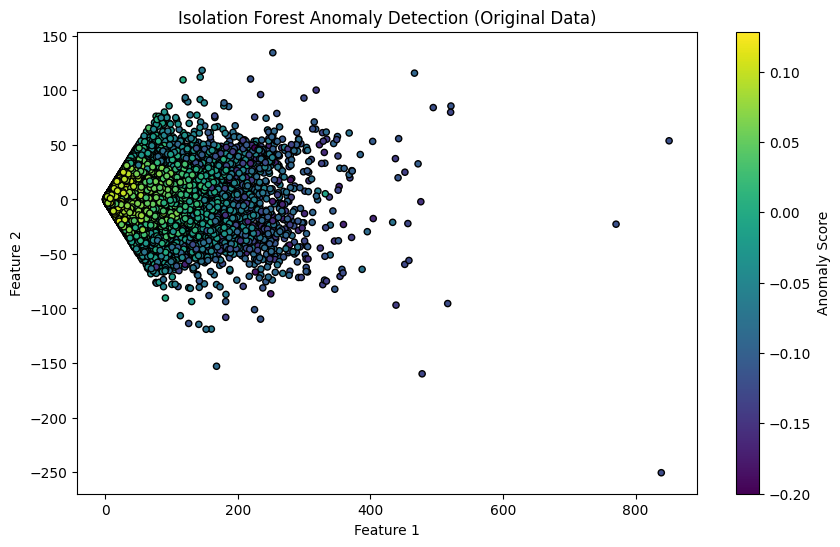

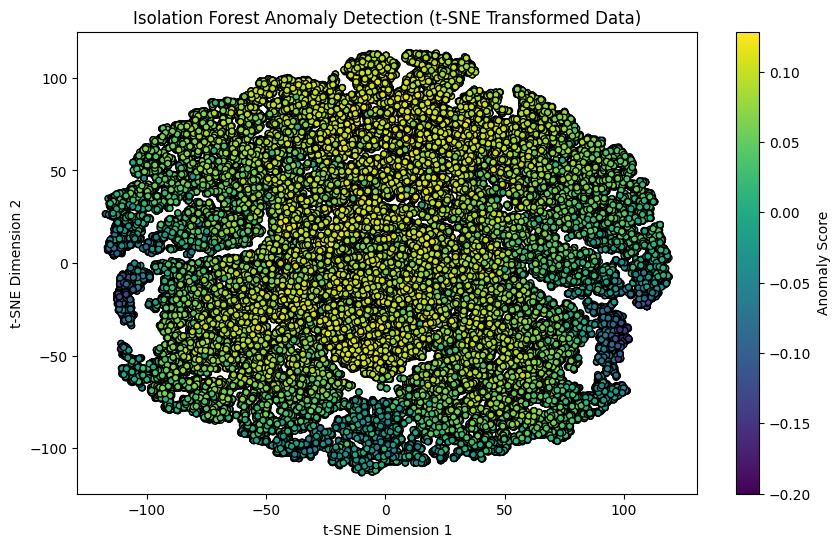

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data from CSV file
cern_df = pd.read_csv("/content/dielectron.csv")

# Drop duplicates and unnecessary columns
cern_df.drop_duplicates(inplace=True)
cern_df.drop(columns=["Event", "Run"], inplace=True)

# Handle missing values
nan_index = cern_df[cern_df['M'].isnull()].index
all_columns = cern_df.columns
imp_mean = IterativeImputer(random_state=0)
cern_df = pd.DataFrame(imp_mean.fit_transform(cern_df), columns=all_columns)
cern_df.loc[nan_index, 'M']

# Apply Isolation Forest
X = cern_df.values

# Specify the contamination level (proportion of outliers)
contamination = 0.1

# Create and fit the Isolation Forest model
clf = IsolationForest(contamination=contamination, random_state=0)
clf.fit(X)

# Predict the anomaly scores for each sample
anomaly_scores = clf.decision_function(X)

# Add the anomaly scores to the dataframe
cern_df['Anomaly Score'] = anomaly_scores

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create scatter plot for original data with anomaly scores as colors
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='viridis', s=20, edgecolor="k")
plt.colorbar(label="Anomaly Score")
plt.title("Isolation Forest Anomaly Detection (Original Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Create scatter plot for t-SNE transformed data with anomaly scores as colors
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=anomaly_scores, cmap='viridis', s=20, edgecolor="k")
plt.colorbar(label="Anomaly Score")
plt.title("Isolation Forest Anomaly Detection (t-SNE Transformed Data)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
